In [ ]:
# Celda 1: Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import joblib

# Librerías de Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, roc_curve, roc_auc_score,
                             precision_score, recall_score, f1_score)

# Configuración de estilo para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Librerías importadas correctamente.")

✅ Librerías importadas correctamente.


In [ ]:
# Celda 2: Carga del Dataset (Subida local)
# Al ejecutar esta celda, aparecerá un botón para seleccionar tu archivo 'datasetDiabetes.csv'
print("Por favor, sube el archivo 'datasetDiabetes.csv':")
uploaded = files.upload()

# Leer el archivo
filename = next(iter(uploaded))
df = pd.read_csv(filename)

print(f"✅ Dataset '{filename}' cargado con éxito. Dimensiones: {df.shape}")
df.head()

Por favor, sube el archivo 'datasetDiabetes.csv':


Saving datasetDiabetes.csv to datasetDiabetes (1).csv
✅ Dataset 'datasetDiabetes (1).csv' cargado con éxito. Dimensiones: (100000, 9)


,genero,edad,hipertension,cardiopatia,historial_tabaquismo,imc,nivel_hba1c,nivel_glucoca,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Celda 3: Limpieza y Corrección de nombres
# Corregimos el typo 'glucoca' -> 'glucosa' si existe
if 'nivel_glucoca' in df.columns:
    df.rename(columns={'nivel_glucoca': 'nivel_glucosa'}, inplace=True)
    print("✅ Columna renombrada a 'nivel_glucosa'.")

# Verificamos valores nulos y duplicados
print(f"\nValores nulos por columna:\n{df.isnull().sum()}")
print(f"\nFilas duplicadas eliminadas: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Mapeo de la variable objetivo (asegurar que sea numérica)
# El dataset parece tener ya 0 y 1, pero confirmamos tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

✅ Columna renombrada a 'nivel_glucosa'.

Valores nulos por columna:
genero                  0
edad                    0
hipertension            0
cardiopatia             0
historial_tabaquismo    0
imc                     0
nivel_hba1c             0
nivel_glucosa           0
diabetes                0
dtype: int64

Filas duplicadas eliminadas: 3854

Tipos de datos:
genero                   object
edad                    float64
hipertension              int64
cardiopatia               int64
historial_tabaquismo     object
imc                     float64
nivel_hba1c             float64
nivel_glucosa             int64
diabetes                  int64
dtype: object


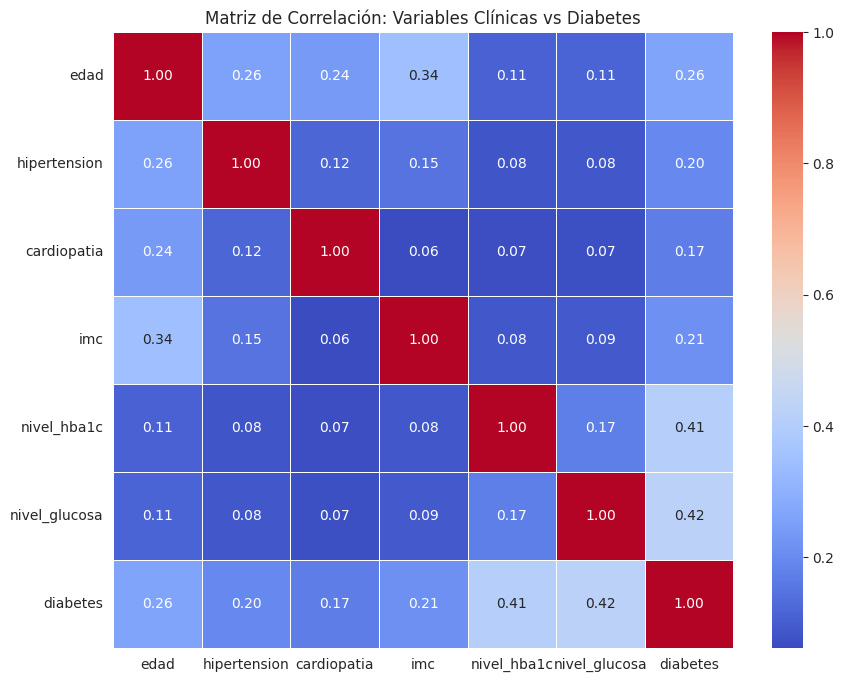

Observación: Las variables con mayor correlación positiva con Diabetes (target) deberían coincidir con nuestra selección.


In [ ]:
# Celda 4: Matriz de Correlación (Objetivo Específico 1)
# Seleccionamos solo columnas numéricas para la correlación
cols_numericas = ['edad', 'hipertension', 'cardiopatia', 'imc', 'nivel_hba1c', 'nivel_glucosa', 'diabetes']
plt.figure(figsize=(10, 8))

# Calculamos la matriz
correlation_matrix = df[cols_numericas].corr()

# Graficamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación: Variables Clínicas vs Diabetes')
plt.show()

print("Observación: Las variables con mayor correlación positiva con Diabetes (target) deberían coincidir con nuestra selección.")

In [ ]:
# Celda 5: Selección de Variables y División del Dataset
# Variables predictoras seleccionadas
features = ['nivel_glucosa', 'nivel_hba1c', 'imc', 'hipertension', 'cardiopatia']
target = 'diabetes'

X = df[features]
y = df[target]

# División: 80% Entrenamiento, 20% Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Datos divididos.\nEntrenamiento: {X_train.shape}\nPrueba: {X_test.shape}")

# Escalado de variables (Importante para Regresión Logística)
scaler = StandardScaler()

# Solo escalamos variables continuas, dejamos las binarias (hipertensión, cardiopatía) tal cual,
# o escalamos todas. Para simplificar código y mejorar convergencia, escalamos X completo.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos estandarizados (StandardScaler).")

✅ Datos divididos.
Entrenamiento: (76916, 5)
Prueba: (19230, 5)
✅ Datos estandarizados (StandardScaler).


In [ ]:
# Celda 6: Entrenamiento del Modelo (Objetivo Específico 2)
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_scaled, y_train)

print("✅ Modelo de Regresión Logística entrenado exitosamente.")

✅ Modelo de Regresión Logística entrenado exitosamente.


--- RESULTADOS DE EVALUACIÓN ---
🔹 Accuracy (Exactitud): 95.94%
🔹 Precision: 89.27%
🔹 Sensibilidad (Recall): 61.32% (Capacidad de detectar positivos)
🔹 Especificidad: 99.29% (Capacidad de descartar negativos)
🔹 F1-Score: 72.70%
🔹 AUC-ROC: 0.9462
------------------------------


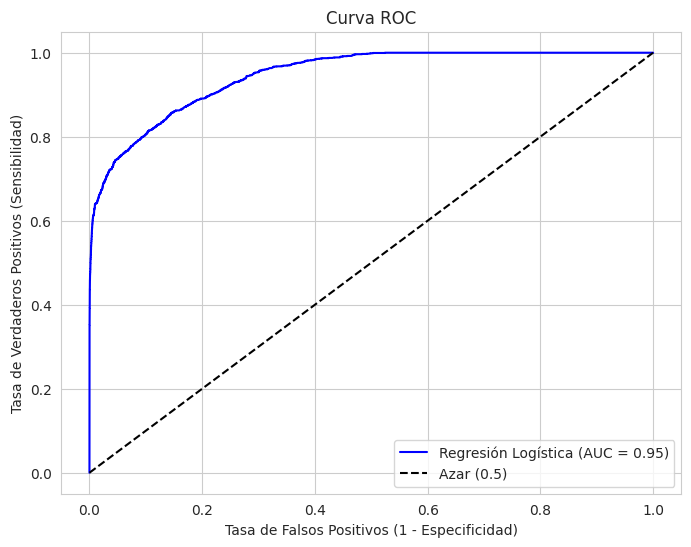

In [ ]:
# Celda 7: Evaluación del Modelo (Objetivo Específico 3)

# Predicciones
y_pred = modelo_lr.predict(X_test_scaled)
y_proba = modelo_lr.predict_proba(X_test_scaled)[:, 1] # Probabilidad de clase 1 (Diabetes)

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred) # Sensibilidad
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Cálculo de Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"--- RESULTADOS DE EVALUACIÓN ---")
print(f"🔹 Accuracy (Exactitud): {acc:.2%}")
print(f"🔹 Precision: {prec:.2%}")
print(f"🔹 Sensibilidad (Recall): {rec:.2%} (Capacidad de detectar positivos)")
print(f"🔹 Especificidad: {specificity:.2%} (Capacidad de descartar negativos)")
print(f"🔹 F1-Score: {f1:.2%}")
print(f"🔹 AUC-ROC: {auc:.4f}")
print("-" * 30)

# Gráfica ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Regresión Logística (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Azar (0.5)')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend()
plt.show()

✅ Tabla de Odds Ratios guardada como 'odds_ratios_reales.csv'.

🧬 ANÁLISIS DE RIESGO (ODDS RATIOS) PARA EL MÉDICO
Variable Clínica  Odds Ratio (OR)  Peso (Beta)
     nivel_hba1c        10.484586     2.349906
     cardiopatia         4.610466     1.528329
    hipertension         3.561964     1.270312
             imc         1.091726     0.087760
   nivel_glucosa         1.034543     0.033960
------------------------------------------------------------------------------------------

🔍 INTERPRETACIÓN DETALLADA:
🔴 NIVEL_HBA1C: (OR = 10.48)
   Interpretación: Aumenta el riesgo. Por cada punto que sube esta variable,
   la probabilidad de diabetes se multiplica por 10.48.

🔴 CARDIOPATIA: (OR = 4.61)
   Interpretación: Aumenta el riesgo. Por cada punto que sube esta variable,
   la probabilidad de diabetes se multiplica por 4.61.

🔴 HIPERTENSION: (OR = 3.56)
   Interpretación: Aumenta el riesgo. Por cada punto que sube esta variable,
   la probabilidad de diabetes se multiplica por 3.56.

🔴

/tmp/ipython-input-2806348839.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio (OR)', y='Variable Clínica', data=tabla_or, palette=colores)


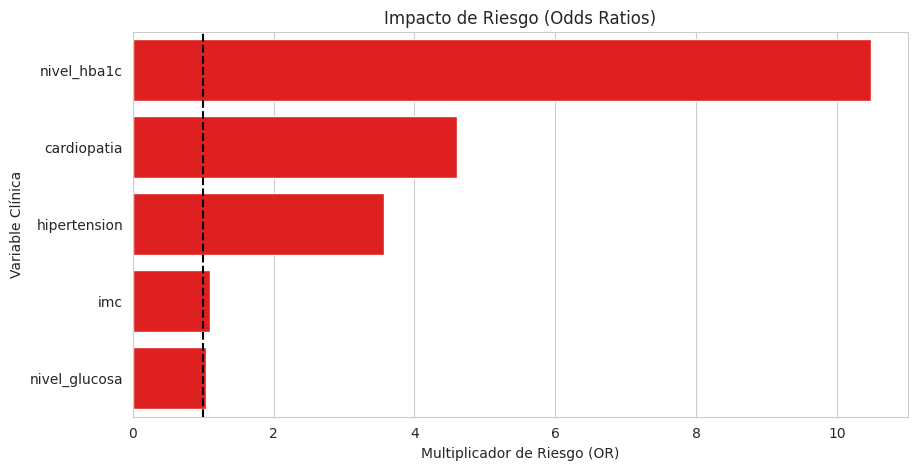

In [ ]:
# CELDA 8 (ACTUALIZADA): ODD RATIOS, INTERPRETACIÓN Y ECUACIÓN
# -----------------------------------------------------------
# 1. Entrenamos un modelo auxiliar con datos ORIGINALES (sin escalar)
#    Esto es necesario para que la ecuación use unidades reales (mg/dL, años, etc.)
#    y no desviaciones estándar.
modelo_interp = LogisticRegression(max_iter=3000, random_state=42)
modelo_interp.fit(X_train, y_train)

# 2. Extraer coeficientes y calcular Odds Ratios (e^beta)
coefs = modelo_interp.coef_[0]
intercepto = modelo_interp.intercept_[0]
odds_ratios = np.exp(coefs)

# 3. Crear Tabla de Resultados
tabla_or = pd.DataFrame({
    'Variable Clínica': features,
    'Peso (Beta)': coefs,
    'Odds Ratio (OR)': odds_ratios
})

# 3. Guardar la tabla de Odds Ratios como un archivo CSV
tabla_or2 = pd.DataFrame({
    'Variable Clínica': features,
    'Odds Ratio (OR)': odds_ratios
})

tabla_or2.to_csv('odds_ratios_reales.csv', index=False)
print("✅ Tabla de Odds Ratios guardada como 'odds_ratios_reales.csv'.")

# Ordenamos de mayor riesgo a menor riesgo
tabla_or = tabla_or.sort_values(by='Odds Ratio (OR)', ascending=False)

print("\n" + "="*90)
print("🧬 ANÁLISIS DE RIESGO (ODDS RATIOS) PARA EL MÉDICO")
print("="*90)
print(tabla_or[['Variable Clínica', 'Odds Ratio (OR)', 'Peso (Beta)']].to_string(index=False))
print("-" * 90)

print("\n🔍 INTERPRETACIÓN DETALLADA:")
for index, row in tabla_or.iterrows():
    or_val = row['Odds Ratio (OR)']
    nombre = row['Variable Clínica']

    if or_val > 1:
        print(f"🔴 {nombre.upper()}: (OR = {or_val:.2f})")
        print(f"   Interpretación: Aumenta el riesgo. Por cada punto que sube esta variable,")
        print(f"   la probabilidad de diabetes se multiplica por {or_val:.2f}.")
    else:
        print(f"🟢 {nombre.upper()}: (OR = {or_val:.2f})")
        print(f"   Interpretación: Factor protector o de bajo impacto (disminuye el riesgo).")
    print("")

print("="*90)
print("📐 ECUACIÓN MATEMÁTICA DEL MODELO (LOGIT)")
print("El modelo utiliza esta fórmula exacta para calcular el puntaje 'z':")
print("-" * 90)

# Construcción del string de la ecuación
ecuacion_str = f"z = {intercepto:.4f}"
for i, row in tabla_or.iterrows():
    signo = "+" if row['Peso (Beta)'] >= 0 else "" # El negativo ya viene con el número
    ecuacion_str += f" {signo} ({row['Peso (Beta)']:.4f} * {row['Variable Clínica']})"

print(ecuacion_str)
print("-" * 90)
print("Probabilidad Final = 1 / (1 + e^(-z))")
print("="*90)

# Gráfico simple de los Odds Ratios
plt.figure(figsize=(10, 5))
colores = ['red' if x > 1 else 'blue' for x in tabla_or['Odds Ratio (OR)']]
sns.barplot(x='Odds Ratio (OR)', y='Variable Clínica', data=tabla_or, palette=colores)
plt.axvline(x=1, color='black', linestyle='--', label='Neutro (1.0)')
plt.title('Impacto de Riesgo (Odds Ratios)')
plt.xlabel('Multiplicador de Riesgo (OR)')
plt.show()

In [ ]:
# Celda 9: Guardado del Modelo y Escalador
joblib.dump(modelo_lr, 'modelo_diabetes_logreg.pkl')
joblib.dump(scaler, 'scaler_diabetes.pkl')

print("✅ Modelo y Escalador guardados como archivos .pkl")
print("   - modelo_diabetes_logreg.pkl")
print("   - scaler_diabetes.pkl")
# Puedes descargarlos desde el panel de archivos de Colab a la izquierda.

✅ Modelo y Escalador guardados como archivos .pkl
   - modelo_diabetes_logreg.pkl
   - scaler_diabetes.pkl


In [ ]:
# CELDA 10 (ACTUALIZADA): SIMULADOR DE DIAGNÓSTICO CON INTERPRETACIÓN DE RIESGO
# -----------------------------------------------------------------------------
def diagnostico_medico_avanzado():
    print("\n" + "█"*60)
    print("🩺  SISTEMA DE APOYO AL DIAGNÓSTICO DE DIABETES (CDSS)")
    print("█"*60)
    print("Ingrese los datos clínicos del paciente actual:")

    try:
        # 1. Ingreso de Datos
        gl = float(input("   • Nivel Glucosa (mg/dL): "))
        hb = float(input("   • Nivel HbA1c (%):       "))
        bmi = float(input("   • IMC:                   "))
        ht = int(input("   • Hipertensión (1=Sí, 0=No): "))
        cp = int(input("   • Cardiopatía  (1=Sí, 0=No): "))

        # 2. Predicción (Usando scaler y modelo entrenado)
        datos = np.array([[gl, hb, bmi, ht, cp]])
        datos_scaled = scaler.transform(datos)
        prob = modelo_lr.predict_proba(datos_scaled)[0][1]
        riesgo_pct = prob * 100

        # 3. Visualización de Resultados
        print("\n" + "="*60)
        print(f"📊 REPORTE DEL PACIENTE")
        print("="*60)

        print(f"Probabilidad de Diabetes:  {riesgo_pct:.2f}%")

        if riesgo_pct > 50:
            print("Clasificación Sugerida:    🔴 ALTO RIESGO (Positivo)")
        else:
            print("Clasificación Sugerida:    🟢 BAJO RIESGO (Negativo)")

        print("-" * 60)
        print("🔍 FACTORES DE IMPACTO EN ESTE PACIENTE (Basado en Odds Ratios):")

        # Recuperamos los OR de la tabla generada en la Celda 8
        # (Asumimos que tabla_or existe y tiene las columnas 'Variable Clínica' y 'Odds Ratio (OR)')
        try:
            # Convertimos la tabla a un diccionario para acceso rápido
            dict_or = dict(zip(tabla_or['Variable Clínica'], tabla_or['Odds Ratio (OR)']))

            # Análisis personalizado
            # Glucosa
            or_gl = dict_or.get('nivel_glucosa', 1.0)
            if gl > 140:
                print(f"   ⚠️ Glucosa Alta ({gl}): Factor de riesgo continuo (OR: {or_gl:.2f} por unidad).")

            # HbA1c
            or_hb = dict_or.get('nivel_hba1c', 1.0)
            if hb > 6.0:
                print(f"   ⚠️ HbA1c Elevada ({hb}%): Aumenta significativamente el riesgo (OR: {or_hb:.2f} por unidad).")

            # Hipertensión
            or_ht = dict_or.get('hipertension', 1.0)
            if ht == 1:
                print(f"   ⚠️ Antecedente Hipertensión: Multiplica el riesgo por {or_ht:.2f}x.")

            # Cardiopatía
            or_cp = dict_or.get('cardiopatia', 1.0)
            if cp == 1:
                print(f"   ⚠️ Antecedente Cardiopatía: Multiplica el riesgo por {or_cp:.2f}x.")

            # IMC
            or_imc = dict_or.get('imc', 1.0)
            if bmi > 30:
                print(f"   ⚠️ Obesidad (IMC {bmi}): Factor agravante (OR: {or_imc:.2f} por punto).")
            elif bmi > 25:
                print(f"   🔸 Sobrepeso (IMC {bmi}): Factor de riesgo moderado.")

            if riesgo_pct < 50 and (ht==1 or cp==1 or gl>140):
                 print("\n   Nota: Aunque la probabilidad es baja, los factores marcados arriba")
                 print("         requieren monitoreo preventivo.")

        except NameError:
            print("   (Nota: Ejecute la Celda 8 primero para ver el detalle de los Odds Ratios)")

        print("="*60)

    except ValueError:
        print("❌ Error: Ingrese solo números válidos.")

# Ejecutar la herramienta
diagnostico_medico_avanzado()


████████████████████████████████████████████████████████████
🩺  SISTEMA DE APOYO AL DIAGNÓSTICO DE DIABETES (CDSS)
████████████████████████████████████████████████████████████
Ingrese los datos clínicos del paciente actual:
   • Nivel Glucosa (mg/dL): 280
   • Nivel HbA1c (%):       6.5
   • IMC:                   31.7
   • Hipertensión (1=Sí, 0=No): 0
   • Cardiopatía  (1=Sí, 0=No): 0

📊 REPORTE DEL PACIENTE
Probabilidad de Diabetes:  92.76%
Clasificación Sugerida:    🔴 ALTO RIESGO (Positivo)
------------------------------------------------------------
🔍 FACTORES DE IMPACTO EN ESTE PACIENTE (Basado en Odds Ratios):
   ⚠️ Glucosa Alta (280.0): Factor de riesgo continuo (OR: 1.03 por unidad).
   ⚠️ HbA1c Elevada (6.5%): Aumenta significativamente el riesgo (OR: 10.48 por unidad).
   ⚠️ Obesidad (IMC 31.7): Factor agravante (OR: 1.09 por punto).


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
